<a href="https://colab.research.google.com/github/AndreMacielSousa/22292-Deep-Learning-Aplicado/blob/main/DL_CHA4_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Deep Learning SIMPLIFIED**

https://www.youtube.com/watch?v=EzbGiB_6TSI&list=PLjJh1vlSEYgvGod9wWiydumYl8hOXixNu&index=13&ab_channel=DeepLearning.TV


**Machine Learning with Python**

https://www.freecodecamp.org/learn/machine-learning-with-python/

**TensorFlow**

https://colab.research.google.com/drive/1F_EWVKa8rbMXi3_fG0w7AtcscFq7Hi7B






---



**Listing 4.1 Loading the IMDB dataset**



In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
 num_words=10000)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

Because we’re restricting ourselves to the top 10,000 most frequent words, no word
index will exceed 10,000:

In [6]:
max([max(sequence) for sequence in train_data])

9999



---


**Listing 4.2 Decoding reviews back to text**

In [7]:
word_index = imdb.get_word_index() 
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) 




---
**Listing 4.3 Encoding the integer sequences via multi-hot encoding**

You can’t directly feed lists of integers into a neural network. They all have different
lengths, but a neural network expects to process contiguous batches of data. You have
to turn your lists into tensors. There are two ways to do that:

* Pad your lists so that they all have the same length, turn them into an integer
tensor of shape (samples, max_length), and start your model with a layer capable of handling such integer tensors (the Embedding layer, which we’ll cover in
detail later in the book).
* Multi-hot encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you
could use a Dense layer, capable of handling floating-point vector data, as the
first layer in your model.

Let’s go with the latter solution to vectorize the data, which you’ll do manually for
maximum clarity.


In [8]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000): 
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1. 
  return results
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)
#Exemplo:
x_train[0]
# Vectorize
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


Now the data is ready to be fed into a neural network. 




---
**Listing 4.4 Model definition**

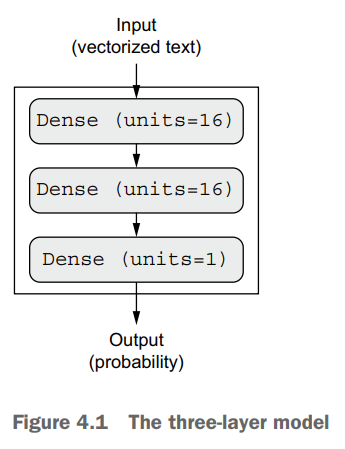



In [9]:
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])



---
**Listing 4.5 Compiling the model**

Finally, you need to choose a loss function and an optimizer. Because you’re facing a
binary classification problem and the output of your model is a probability (you end
your model with a single-unit layer with a sigmoid activation), it’s best to use the
*binary_crossentropy* loss. It isn’t the only viable choice: for instance, you could use
*mean_squared_error*. But crossentropy is usually the best choice when you’re dealing with models that output probabilities. *Crossentropy* is a quantity from the field of information theory that measures the distance between probability distributions or, in this
case, between the ground-truth distribution and your predictions.

As for the choice of the optimizer, we’ll go with *rmsprop*, which is a usually a good
default choice for virtually any problem.

Here’s the step where we configure the model with the *rmsprop* optimizer and
the *binary_crossentropy* loss function. Note that we’ll also monitor accuracy during
training. 



In [10]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])



---
**Listing 4.6 Setting aside a validation set**

a deep learning model should never be evaluated on its
training data—it’s standard practice to use a validation set to monitor the accuracy of
the model during training. Here, we’ll create a validation set by setting apart 10,000
samples from the original training data.


In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]



---

**Listing 4.7 Training your model**

We will now train the model for 20 epochs (20 iterations over all samples in the training data) in mini-batches of 512 samples. At the same time, we will monitor loss and
accuracy on the 10,000 samples that we set apart. We do so by passing the validation
data as the *validation_data* argument.


In [12]:
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 46ms/step - loss: 0.5006 - accuracy: 0.7884 - val_loss: 0.3754 - val_accuracy: 0.8747
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3006 - accuracy: 0.9040 - val_loss: 0.3038 - val_accuracy: 0.8873
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2177 - accuracy: 0.9299 - val_loss: 0.2983 - val_accuracy: 0.8810
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1716 - accuracy: 0.9453 - val_loss: 0.2746 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1395 - accuracy: 0.9571 - val_loss: 0.2810 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1112 - accuracy: 0.9676 - val_loss: 0.2994 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0963 - accuracy: 0.9727 - val_loss: 0.3106 - val_accuracy: 0.8849
Epoch 8/20
30

Note that the call to model.fit() returns a History object, as you saw in chapter 3.
This object has a member history, which is a dictionary containing data about everything that happened during training.

In [13]:
 history_dict = history.history
 history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

 In the following two listings, let’s use Matplotlib to plot
the training and validation loss side by side



---

**Listing 4.8 Plotting the training and validation loss**



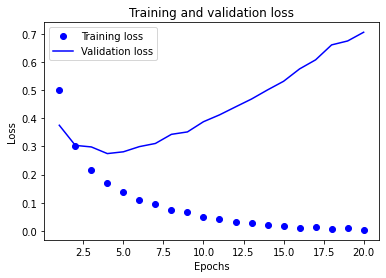

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



---
**Listing 4.9 Plotting the training and validation accuracy**


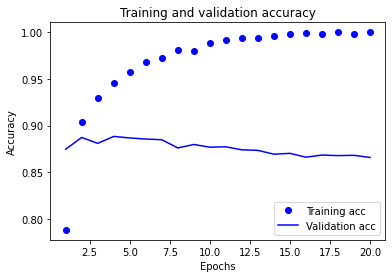

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



---

**Listing 4.10 Retraining a model from scratch**


In [16]:
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.4760 - accuracy: 0.8117
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2660 - accuracy: 0.9084
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2025 - accuracy: 0.9282
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2918 - accuracy: 0.8860


[0.2917683720588684, 0.8859999775886536]

In [17]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.19629171],
       [0.9999486 ],
       [0.94523764],
       ...,
       [0.09546987],
       [0.06805281],
       [0.61326486]], dtype=float32)












---


---


Tensor Flow - Tensor

In [ ]:
import tensorflow as tf
print(tf.version)
t = tf.zeros([5,5,5,5])
print(t)

t = tf.reshape (t, [125, -1])
print(t)